In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#df=pd.read_excel('C:/Users/user/Downloads/Jypiter/a_b_test.xlsx')

In [36]:
df.head(1)

,employee,work mode,"average performance grade (march, april)",employee_satisfaction_grade
0,zaposleni 1,hybrid (1 day from home weekly),8.5,9.0


In [37]:
df.rename(columns={'average performance grade (march, april)': 'avg_grade'}, inplace=True)
df['avg_grade'] = df['avg_grade'].astype(str).str.replace(',', '.').astype(float)

In [38]:
onsite_group = df[df['work mode'] == 'on site']['avg_grade']
hybrid_group = df[df['work mode'].str.lower().str.contains("hybrid")]['avg_grade']

In [39]:
print("Shapiro test for on-site group:", shapiro(onsite_group))
print("Shapiro test for hybrid group:", shapiro(hybrid_group))

Shapiro test for on-site group: ShapiroResult(statistic=np.float64(0.8581528120846762), pvalue=np.float64(0.007323193068702087))
Shapiro test for hybrid group: ShapiroResult(statistic=np.float64(0.906777811751045), pvalue=np.float64(0.05535117302270365))


In [40]:
stat, p = levene(onsite_group, hybrid_group)
print("Levene's test for equal variances: p =", p)

Levene's test for equal variances: p = 0.8964588891209712


In [41]:
t_stat, p_value = ttest_ind(onsite_group, hybrid_group, equal_var=True)
print(f"On-site avg: {onsite_group.mean():.2f}")
print(f"Hybrid avg: {hybrid_group.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

On-site avg: 7.20
Hybrid avg: 7.92
T-statistic: -2.253
P-value: 0.0301


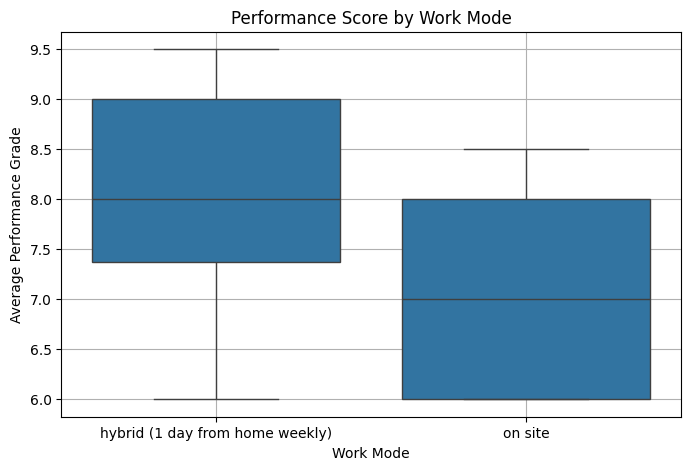

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='work mode', y='avg_grade', data=df)
plt.title("Performance Score by Work Mode")
plt.ylabel("Average Performance Grade")
plt.xlabel("Work Mode")
plt.grid(True)
plt.show()

In [43]:

mean_diff = hybrid_group.mean() - onsite_group.mean()
pooled_std = np.sqrt((onsite_group.std()**2 + hybrid_group.std()**2) / 2)
cohen_d = mean_diff / pooled_std
print("Cohen's d:", round(cohen_d, 2))

Cohen's d: 0.71


In [44]:

df['satisfaction'] = df['employee_satisfaction_grade'].astype(str).str.replace(',', '.').astype(float)
onsite_satisfaction = df[df['work mode'].str.lower() == 'on site']['satisfaction']
hybrid_satisfaction = df[df['work mode'].str.lower().str.contains('hybrid')]['satisfaction']


t_stat, p_value = ttest_ind(onsite_satisfaction, hybrid_satisfaction, equal_var=True)


shapiro_onsite = shapiro(onsite_satisfaction)
shapiro_hybrid = shapiro(hybrid_satisfaction)


levene_test = levene(onsite_satisfaction, hybrid_satisfaction)


mean_diff = hybrid_satisfaction.mean() - onsite_satisfaction.mean()
pooled_std = np.sqrt((np.std(onsite_satisfaction, ddof=1) ** 2 + np.std(hybrid_satisfaction, ddof=1) ** 2) / 2)
cohen_d = mean_diff / pooled_std


print("=== A/B Test for Job Satisfaction ===")
print(f"On-site avg satisfaction: {onsite_satisfaction.mean():.2f}")
print(f"Hybrid avg satisfaction: {hybrid_satisfaction.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Shapiro-Wilk p (on-site): {shapiro_onsite.pvalue:.4f}")
print(f"Shapiro-Wilk p (hybrid): {shapiro_hybrid.pvalue:.4f}")
print(f"Levene's test p: {levene_test.pvalue:.4f}")
print(f"Cohen's d: {cohen_d:.2f}")

=== A/B Test for Job Satisfaction ===
On-site avg satisfaction: 7.69
Hybrid avg satisfaction: 8.40
T-statistic: -2.075
P-value: 0.0448
Shapiro-Wilk p (on-site): 0.0602
Shapiro-Wilk p (hybrid): 0.1508
Levene's test p: 0.9364
Cohen's d: 0.66


C:\Users\user\AppData\Local\Temp\ipykernel_13204\1946606357.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


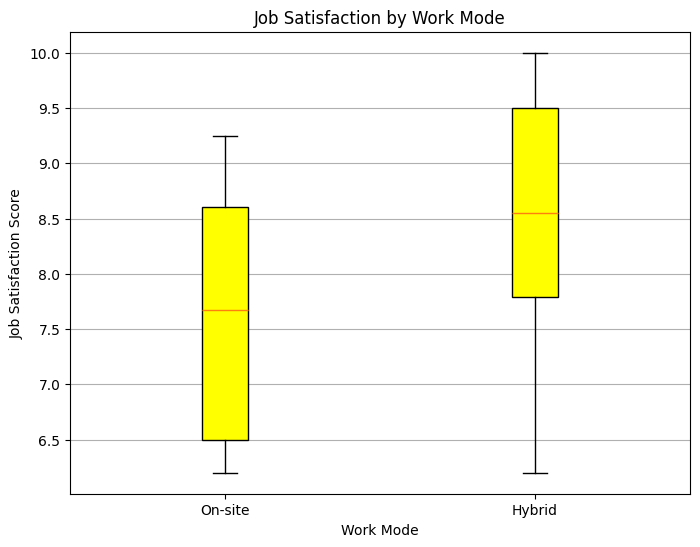

In [46]:

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [onsite_satisfaction, hybrid_satisfaction],
    labels=['On-site', 'Hybrid'],
    patch_artist=True,
    boxprops=dict(facecolor='yellow')
)

plt.title('Job Satisfaction by Work Mode')
plt.xlabel('Work Mode')
plt.ylabel('Job Satisfaction Score')
plt.grid(axis='y')
plt.show()